<h1>Prediction of Dental Caries Using Machine Learning In Personlized Medecine</h1>

## Importing Packages

In [1]:
#load pandas and numpy modules
import os 
import pandas as pd
import numpy as np
%matplotlib inline
 
#read raw data (here we used 50% concentration data, 25% conc. data is available on 'neu25').
#df = pd.read_excel('nitrilase_descriptors.xlsx',sheet_name = 'neu50').copy()
#df = pd.read_csv('Oral_health_care_dataset.csv')
df = pd.read_excel('Oral_health_care_dataset.xlsx').copy()


print(df.shape)

df.head(5)

(22288, 45)


,act_caries_p,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,0,14,1,2,1,2,1,2,1,0,...,0,0,0,0,1,3,0,0,0,0
1,0,12,1,2,1,3,1,1,1,0,...,0,0,0,0,3,3,0,0,0,0
2,1,11,1,1,0,4,1,2,0,0,...,0,1,0,0,2,2,1,0,0,0
3,0,25,2,2,1,4,1,2,1,0,...,0,1,0,0,2,1,0,0,0,0
4,0,26,2,1,1,3,1,2,1,0,...,0,1,0,0,1,3,0,0,0,0


## Inspecting Data

In [2]:
#check if this dataframe is missing any values
#check the columns and the data type of each columns
if df.isnull().values.any():
    print ('There are missing values! Check and correct before proceed!')
    raise
else:
    print('There is no missing values in this dataframe.\n')

#inspect data
#print('check data type for each columns:')
#df.info(verbose=True) 

There is no missing values in this dataframe.



#### Create a (version of) folder to save images

In [3]:
#change the version to avoid overwrite
img_dir = './img_V/' 

if not os.path.isdir(img_dir):
    print('Creating image folder {}. Figures will be saved here'.format(img_dir))
    os.mkdir(img_dir)
else:
    print('Image folder "{}" already exist, figures created will overwrite!'.format(img_dir))

Image folder "./img_V/" already exist, figures created will overwrite!


In [4]:
df_cut = df

In [5]:
df_cut = df_cut.drop('act_caries_p',axis=1)
df_cut.head()

,Sido_No,Region_No,Gender,prev_caries_p,X1,X2,X3,X4_1,X4_2,X4_3,...,X14_6,X14_7,X14_8,X14_9,x15_1,X16,act_caries_p.1,Calculus,Bleeding,Fluorosis
0,14,1,2,1,2,1,2,1,0,0,...,0,0,0,0,1,3,0,0,0,0
1,12,1,2,1,3,1,1,1,0,0,...,0,0,0,0,3,3,0,0,0,0
2,11,1,1,0,4,1,2,0,0,0,...,0,1,0,0,2,2,1,0,0,0
3,25,2,2,1,4,1,2,1,0,0,...,0,1,0,0,2,1,0,0,0,0
4,26,2,1,1,3,1,2,1,0,0,...,0,1,0,0,1,3,0,0,0,0


## Data preparation

### Remove highly correlated features.

# of features before drop: 44


<ipython-input-6-4b8ff1de69c3>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(np.bool))


# of features after drop: 43
# of features dropped: 1


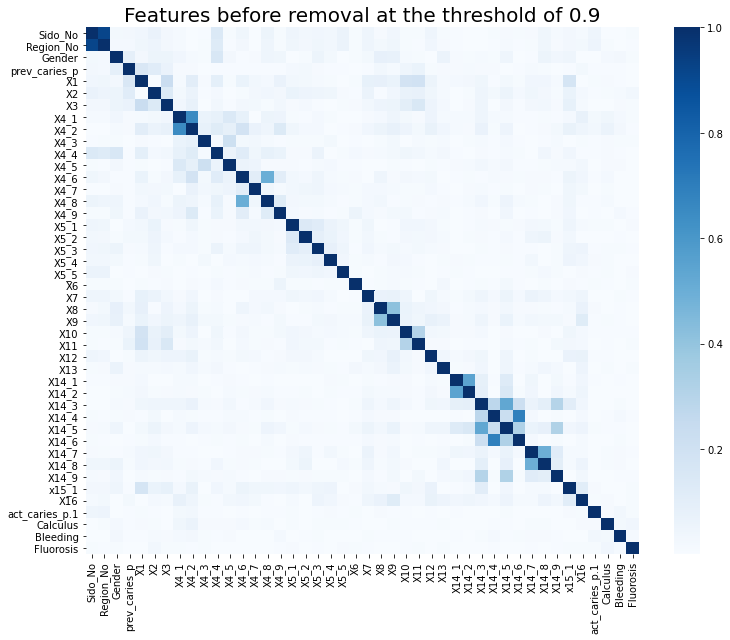

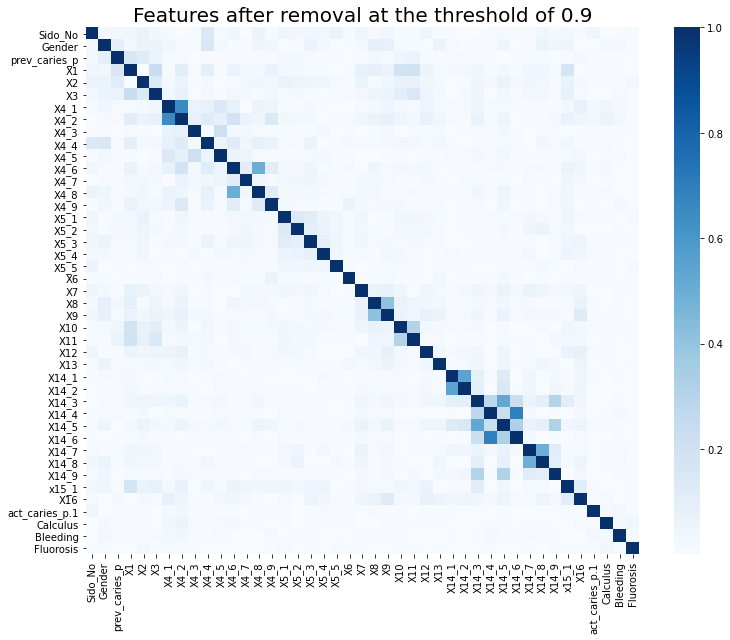

In [6]:
import matplotlib.pyplot as plt

#remove highly correlated features (corr > 90%)
import seaborn as sns

#features
features_pre = df_cut

print('# of features before drop:', features_pre.shape[1])

#create correlation matrix
corr_matrix_before = features_pre.corr().abs()

#set a cutoff threshold (usually 0.9 or 0.85)
cut_th = 0.90

#plot heatmap before removing highly correlated features
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr_matrix_before, cmap = 'Blues')
plt.title('Features before removal at the threshold of {}'.format(cut_th),fontsize = 20)
plt.tight_layout()
plt.savefig(img_dir + 'corr_matrix_before.png')

#select upper triangle of correlation matrix
upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(np.bool))

#drop highly correlated features based on set threshold
to_drop = [column for column in upper.columns if any(upper[column] > cut_th)]
df_cut_cor = df_cut.drop(columns = to_drop)

#plot heatmap after removing highly correlated features
corr_matrix_after = df_cut_cor.iloc[:,:].corr().abs()
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr_matrix_after, cmap = 'Blues')
plt.title('Features after removal at the threshold of {}'.format(cut_th),fontsize = 20)
plt.tight_layout()
plt.savefig(img_dir + 'corr_matrix_after.png')

print('# of features after drop:', features_pre.shape[1]-len(to_drop))
print('# of features dropped:', len(to_drop))

### Data scaling
Note this step may not necccesary for some methods such as tree-based methods.

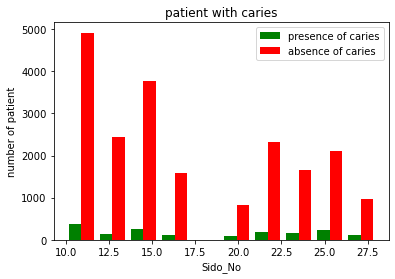

In [7]:
import matplotlib.pyplot as plt

df_0 = df[df.act_caries_p==0].Sido_No
df_1 = df[df.act_caries_p==1].Sido_No

plt.xlabel('Sido_No')
plt.ylabel('number of patient')
plt.title('patient with caries')
plt.hist([df_1,df_0],color=['green','red'],label=['presence of caries','absence of caries'])
plt.legend()

In [8]:
df.act_caries_p.value_counts()

0    20593
1     1695
Name: act_caries_p, dtype: int64

<h3>Modification starting</h3>

In [9]:
import imblearn
print(imblearn.__version__)

0.8.0


In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df_new = df
df_new.shape

df_cut_cor=df_new.drop('act_caries_p',axis=1)
df_cut_cor=df_cut_cor.drop('Region_No',axis=1)
df_scaled = df_cut_cor.copy()

Y = df_new['act_caries_p']
X = df_scaled

over = SMOTE(sampling_strategy=0.7)
#under = RandomUnderSampler(sampling_strategy=0.5)

#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)

X, Y = over.fit_resample(X, Y)

In [11]:
from collections import Counter

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 20593, 1: 14415})


In [12]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X)
# Scale the train set
X = scaler.transform(X)
# Define the scaler 
#scaler = StandardScaler().fit(X_train)

In [13]:
import numpy as np
#convert the data to numpy arrays
X = np.array(X)

In [14]:
df_v = pd.DataFrame(X)
df_v

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.523016,1.221340,1.022827,-0.698329,-0.555881,0.469181,1.859089,-1.246829,-0.0815,-0.602738,...,-0.092501,-0.844774,-0.752751,-0.148063,-0.953762,0.035111,-0.238155,-0.228767,-0.294275,-0.346141
1,-0.859893,1.221340,1.022827,0.619290,-0.555881,-2.131372,1.859089,-1.246829,-0.0815,1.659096,...,-0.092501,-0.844774,-0.752751,-0.148063,2.354731,0.035111,-0.238155,-0.228767,-0.294275,-0.346141
2,-1.028332,-0.818772,-0.977683,1.936909,-0.555881,0.469181,-0.537898,-1.246829,-0.0815,-0.602738,...,-0.092501,1.183749,-0.752751,-0.148063,0.700484,-0.536600,4.198951,-0.228767,-0.294275,-0.346141
3,1.329806,1.221340,1.022827,1.936909,-0.555881,0.469181,1.859089,-1.246829,-0.0815,-0.602738,...,-0.092501,1.183749,-0.752751,-0.148063,0.700484,-1.108311,-0.238155,-0.228767,-0.294275,-0.346141
4,1.498244,-0.818772,1.022827,0.619290,-0.555881,0.469181,1.859089,-1.246829,-0.0815,-0.602738,...,-0.092501,1.183749,-0.752751,-0.148063,-0.953762,0.035111,-0.238155,-0.228767,-0.294275,-0.346141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35003,1.666683,1.221340,-0.977683,1.936909,-0.555881,-2.131372,1.859089,-1.246829,-0.0815,-0.602738,...,-0.092501,1.183749,-0.752751,-0.148063,0.700484,-0.536600,-0.238155,-0.228767,-0.294275,1.956294
35004,-1.028332,-0.818772,-0.977683,0.619290,-0.555881,0.469181,-0.537898,0.802035,-0.0815,-0.602738,...,-0.092501,-0.844774,-0.752751,-0.148063,-0.953762,0.606823,-0.238155,-0.228767,-0.294275,-0.346141
35005,-1.196770,1.221340,-0.977683,0.619290,-0.555881,0.469181,-0.537898,0.802035,-0.0815,-0.602738,...,-0.092501,1.183749,-0.752751,-0.148063,-0.953762,0.035111,-0.238155,-0.228767,-0.294275,-0.346141
35006,-0.523016,-0.818772,-0.977683,0.619290,-0.555881,0.469181,-0.537898,0.802035,-0.0815,-0.602738,...,-0.092501,-0.844774,-0.752751,-0.148063,-0.953762,-0.536600,-0.238155,-0.228767,-0.294275,-0.346141


# Machine learning

## Find a proper oversampling method (for imbalanced data).


In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#features/target splitting
X = df_v
y = Y
#y=y.astype('int32')
#training/testing data splitting
#test oversampling on 75% of the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 888)

#helper function to apply resampling
def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    if type(X) is np.ndarray and type(y) is np.ndarray:
        X_resampled,y_resampled = transformer.fit_resample(X,y)
    elif type(X) is pd.DataFrame and type(y) is pd.Series:
        X_resampled,y_resampled = transformer.fit_resample(X.values,y.values.ravel())
    else:
        print('X,y are neither ndarray nor dataframe or not the same type')
        raise
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

#transform dataset
datasets = []
datasets.append(("Original",X_train,y_train))
#methods = ['RandomOverSampler','SMOTE','BorderlineSMOTE','SVMSMOTE','ADASYN','SMOTEENN','SMOTETomek']
methods = ['RandomOverSampler','SMOTE','BorderlineSMOTE','SVMSMOTE','SMOTEENN','SMOTETomek']

for m in methods:
    apply_method = 'datasets.append(transform({}(random_state = 42),X_train,y_train))'.format(m)
    eval(apply_method)
    
    
#calculate the performance of each sampling method
resample_scores = []
for sampling_type,X,y in datasets:
    print("Training on {}".format(sampling_type))
    rf = RandomForestClassifier(n_jobs = -1, random_state = 42,n_estimators = 160)
    rf.fit(X.values,y.values.ravel())
    pred_test = rf.predict(X_test.values)
    pred_test_probs = rf.predict_proba(X_test.values)
#    probs = rf.decision_function(X_test.values) #be used with linear regression.
    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),pred_test)
#    p,r,t = precision_recall_curve(y_test.values.ravel(),probs)
    resample_scores.append((sampling_type,
                   f1_score(y_test.values.ravel(),pred_test),
                   precision_score(y_test.values.ravel(),pred_test),
                   recall_score(y_test.values.ravel(),pred_test),
                   accuracy_score(y_test.values.ravel(),pred_test),
                   auc(fpr, tpr),
#                   auc(p,r,reorder=True),
                   confusion_matrix(y_test.values.ravel(),pred_test)))

#print results
sampling_results = pd.DataFrame(resample_scores, columns=['Sampling Type','F1','precision','recall',
                                                 'accuracy','ROC_AUC','confusion_matrix'])
#sampling_results.rename(columns=str.upper,inplace = True)
sampling_results.round(2)

Transforming RandomOverSampler
Transforming SMOTE
Transforming BorderlineSMOTE
Transforming SVMSMOTE
Transforming SMOTEENN
Transforming SMOTETomek
Training on Original
Training on RandomOverSampler
Training on SMOTE
Training on BorderlineSMOTE
Training on SVMSMOTE
Training on SMOTEENN
Training on SMOTETomek


,Sampling Type,F1,precision,recall,accuracy,ROC_AUC,confusion_matrix
0,Original,0.91,0.94,0.88,0.92,0.92,"[[3938, 173], [355, 2536]]"
1,RandomOverSampler,0.90,0.93,0.88,0.92,0.92,"[[3905, 206], [346, 2545]]"
2,SMOTE,0.90,0.93,0.88,0.92,0.91,"[[3914, 197], [355, 2536]]"
3,BorderlineSMOTE,0.91,0.93,0.88,0.92,0.92,"[[3924, 187], [342, 2549]]"
4,SVMSMOTE,0.90,0.92,0.88,0.92,0.92,"[[3899, 212], [340, 2551]]"
5,SMOTEENN,0.85,0.82,0.88,0.87,0.87,"[[3558, 553], [361, 2530]]"
6,SMOTETomek,0.90,0.93,0.87,0.92,0.91,"[[3912, 199], [383, 2508]]"


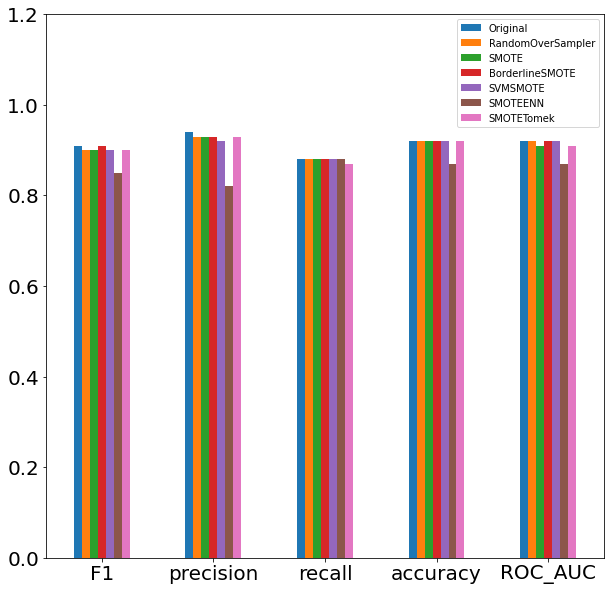

In [16]:
#print out resampling result by metrics
resamp_metrics = sampling_results.transpose().iloc[:-1]
resamp_metrics.rename(columns = resamp_metrics.iloc[0],inplace=True)
resamp_metrics = resamp_metrics.iloc[1:].astype('float').round(2)
resamp_metrics_plot = resamp_metrics.plot(ylim = (0,1.2), kind = 'bar', 
                                          rot = 0 , stacked = False, 
                                          figsize = (10,10), fontsize = 20
                                         ).legend(loc=0, prop={'size': 10})
fig = resamp_metrics_plot.get_figure()
fig.savefig(img_dir + "resamp_metrics_plot.png")

Results indicate that resampling does not improve performance. Therefore, we decide **not** to apply resampling method for this dataset. 

## Hyperparameter tuning using Grid Search (without oversampling).
This is to find the optimum hyperparameters for each model.  
Based on Grid Search [tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) from scikit-learn.

### Setting up hyperparameters to be used in Grid Search.
We applied four different classifiers to this dataset including:
1. Gradient Boosted Decision Trees (GBDT)
2. Random Forest (RF)
3. Logistic Regression (LR)
4. Support Vector Machines (SVM)

In [17]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared

#consider reducing dimensions when hyperparameter tuning if computationally too expensive
#

#GBDT----------------------------
############################################
GBDT_param_grid = {"n_estimators" : range(50,300,50),
                   "max_depth" : [None, 5, 10, 20, 40, 160, 320],
                   "min_samples_leaf" : [1, 2, 4, 8, 16, 32, 64],
                   "learning_rate": np.arange(0.01,0.1,0.01),
                   "subsample": np.arange(0.5,0.9,0.05),
                   "max_features":['auto', 5,10,20,30]
                  }

GBDT_tuned_params = {"max_features":'auto',
                  "max_depth": None,
                  "min_samples_leaf" : 2,
                  "max_depth" : 5,
                  'learning_rate': 0.08, 
                  'n_estimators': 100,
                  "subsample": 0.85
                  }

GBDT = GradientBoostingClassifier(random_state=42).set_params(**GBDT_tuned_params)


#GBDT----------------------------
############################################


#RF------------------------------
############################################
RF_param_grid = {"n_estimators" : [160, 320, 640, 1280],
                 "max_depth" : [None, 5, 10, 20, 40, 160, 320],
                 "min_samples_leaf" : [1, 2, 4, 8, 16, 32, 64],
                 "max_features":['auto', 5,10,20,30]
                } 

RF_tuned_params = {'max_depth': None,
                   'max_features': 'auto',
                   'min_samples_leaf': 1,
                   'n_estimators': 160,
                   'n_jobs': -1,
                   'random_state': 42
                  }

RF = RandomForestClassifier(random_state=42,n_jobs=-1).set_params(**RF_tuned_params)
#RF------------------------------
############################################



#LR------------------------------
############################################
LR_param_grid = {'penalty': ['l1', 'l2'], #note l1 only compatible with liblinear
                 'C':[0.005,0.01,1,5,10],
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

LR_tuned_params = {'C': 1, 
                   'penalty': 'l1', 
                   'solver': 'liblinear'
                  }

LR = LogisticRegression(random_state = 42).set_params(**LR_tuned_params)

#LR------------------------------
############################################


#SVM------------------------------
############################################
SVM_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'], 
                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                 'probability':[True]
                 }  

SVM_tuned_params = {'C': 1000,
                    'gamma': 0.0001, 
                    'kernel': 'rbf',
                     'probability': True
                    }
SVM = SVC(random_state=42).set_params(**SVM_tuned_params)

#SVM------------------------------
############################################


### Grid Search cross validation search
Make sure the `train/test` data splitting use the **same** random_state/seed for the **Grid Search**, **cross validation** and **test set** to avoid data leakage.

In [18]:
from sklearn.metrics import (recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, 
                             auc,roc_auc_score,roc_curve, precision_recall_curve,classification_report)
from sklearn.model_selection import GridSearchCV,train_test_split

In [19]:
model = LR
param_grid = LR_param_grid

#to test other metrics, uncomment below or add your own metrics
scores = [
        'accuracy',
#        'precision',
#          'roc_auc'
         ]

for score in scores:
    print("# Tuning the hyper-parameters for {}".format(score))
    gs = GridSearchCV(model, param_grid = param_grid, cv = 10, scoring='%s' % score,n_jobs=-1)
    gs.fit(X_train.values, y_train.values.ravel())

    print("Best parameters set found:\n",gs.best_params_)
    print("Best score:\n", gs.best_score_) 

    
#detailed scores for grid_search
#pd.DataFrame(gs.cv_results_)

# Tuning the hyper-parameters for accuracy


/home/soualihou/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.82135869        nan 0.82225147 0.82364406
 0.82364406 0.82303717 0.82364406 0.82364406        nan        nan
 0.82260846        nan 0.82282259 0.82378691 0.82378691 0.82335847
 0.82378691 0.82378691        nan        nan 0.8235726         nan
 0.82353689 0.8235012  0.8235012  0.8235012  0.8235012  0.8235012
        nan        nan 0.82350119        nan 0.82350119 0.82346548
 0.82346548 0.82346548 0.82350119 0.82346548        nan        nan
 0.82346548        nan 0.82346548 0.82346548 0.82346548 0.82346548
 0.82350119 0.82350119]
  warnings.warn(


Best parameters set found:
 {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:
 0.8237869128372521


## K-fold cross validation and testing for models with tuned parameters

### Setting up K-fold validation helper fuction.

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import (recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, 
                             auc,roc_auc_score,roc_curve, precision_recall_curve,classification_report)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#K-fold validation function will take six arguments: 
#1. model, 2. train set, 3.test set, 4.# of fold, 5.shuffle boolean, 6.random_state.
def kf_cv(clf, X, y, folds = 10, shuf = True, random_state=42):
    cv = KFold(n_splits=folds, random_state=42, shuffle=shuf)
    f1,prec,recall,acc,ROC_AUC,conf = ([],[],[],[],[],[])
    metric_cols=['F1','precision','recall','accuracy','ROC_AUC','confusion_matrix']
    print('Classifier ##{0}## will be used with {1} folds, and shuffle mode is {2}'.format(clf.__class__.__name__,
                                                                                       folds,
                                                                                       'on' if shuf else 'off')
         )
    
    for train_index, test_index in cv.split(X):
        #turn on the below code will print train_index/test_index and may help understand the details and debug.
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index)
        
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        #if sampling method is used, use this to avoid warnings: clf.fit(X_train.values, y_train.values.ravel())
        clf.fit(X_train, y_train.ravel())
        
        pred_test = clf.predict(X_test)
        pred_test_probs = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test,pred_test)
        
        f1.append(f1_score(y_test,pred_test))
        prec.append(precision_score(y_test,pred_test))
        recall.append(recall_score(y_test,pred_test))
        acc.append(accuracy_score(y_test,pred_test))
        ROC_AUC.append(roc_auc_score(y_test, pred_test_probs[:,1]))       
        conf.append(confusion_matrix(y_test,pred_test))
        
    #return a dataframe consisting five metrics and confusion matrix.
    return pd.DataFrame(zip(f1,prec,recall,acc,ROC_AUC,conf), columns = metric_cols)


### Run 10-fold cross validation (CV)
Train/test spliting is set to 80/20.  
Make sure the `train/test` data splitting use the **same** random_state/seed for the **Grid Search**, **cross validation** and **test set** to avoid data leakage.

In [21]:
#setting up train/test set (80/20), make sure this is the same split as the GS.

#features/target splitting
X = df_v
y = Y

#make sure datasets are converted from pandas DataFrame into numpy ndarray avoid errors in machine learning.
if type(X) is not np.ndarray:
    X, y = X.to_numpy(),y.to_numpy()
else:
    print('X,y already converted to ndarray')
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 888) #same random_state as previous GS

#setting up models using tuned hyperparameters from Grid Search.
GBDT = GradientBoostingClassifier(random_state=42).set_params(**GBDT_tuned_params)
RF = RandomForestClassifier(random_state=42).set_params(**RF_tuned_params)
LR = LogisticRegression(random_state=42).set_params(**LR_tuned_params)
SVM = SVC(random_state=42).set_params(**SVM_tuned_params)

#create dictionary to store k-fold CV results
cv_score_dict = {}
#create a dataframe to store the mean and standard error of the mean (SEM) from k-fold CV
cv_score_mean = pd.DataFrame()
cv_score_sem = pd.DataFrame()

#run k-fold CV
for model_name in ['RF','GBDT','LR','SVM']:
    clf = eval(model_name)
    cv_score_dict[model_name] = kf_cv(clf,X_train,y_train,10,True)
    cv_score_mean[model_name] = cv_score_dict[model_name].mean()[:-1]
    cv_score_sem[model_name] = cv_score_dict[model_name].sem()
    
cv_score_mean = cv_score_mean.transpose().astype(float).round(2)
cv_score_sem = cv_score_sem.transpose().round(2)

print('\n\ndetail results in dictionary "cv_score_dict" using model_name as key')
print('Performace summary in df "cv_score_mean" and "cv_score_sem"')

# check mean performance of each model.
cv_score_mean

Classifier ##RandomForestClassifier## will be used with 10 folds, and shuffle mode is on
Classifier ##GradientBoostingClassifier## will be used with 10 folds, and shuffle mode is on
Classifier ##LogisticRegression## will be used with 10 folds, and shuffle mode is on
Classifier ##SVC## will be used with 10 folds, and shuffle mode is on


detail results in dictionary "cv_score_dict" using model_name as key
Performace summary in df "cv_score_mean" and "cv_score_sem"


,F1,precision,recall,accuracy
RF,0.90,0.93,0.88,0.92
GBDT,0.82,0.84,0.79,0.85
LR,0.78,0.80,0.76,0.82
SVM,0.79,0.82,0.77,0.83


In [22]:
# for example, to see detailed result of RF:
cv_score_dict['RF']

,F1,precision,recall,accuracy,ROC_AUC,confusion_matrix
0,0.911686,0.940202,0.884848,0.929311,0.972527,"[[1581, 65], [133, 1022]]"
1,0.907959,0.937557,0.880172,0.926098,0.970319,"[[1573, 68], [139, 1021]]"
2,0.909496,0.933211,0.886957,0.927526,0.969486,"[[1578, 73], [130, 1020]]"
3,0.905058,0.935780,0.876289,0.923599,0.965502,"[[1567, 70], [144, 1020]]"
4,0.906278,0.938737,0.875989,0.926455,0.966271,"[[1599, 65], [141, 996]]"
5,0.900590,0.922791,0.879433,0.921814,0.962620,"[[1590, 83], [136, 992]]"
6,0.910634,0.941774,0.881488,0.928571,0.967332,"[[1581, 63], [137, 1019]]"
7,0.906915,0.935101,0.880379,0.925000,0.967720,"[[1567, 71], [139, 1023]]"
8,0.891977,0.929038,0.857759,0.913929,0.958312,"[[1564, 76], [165, 995]]"
9,0.892696,0.928705,0.859375,0.915000,0.953973,"[[1572, 76], [162, 990]]"


### Plot k-fold CV

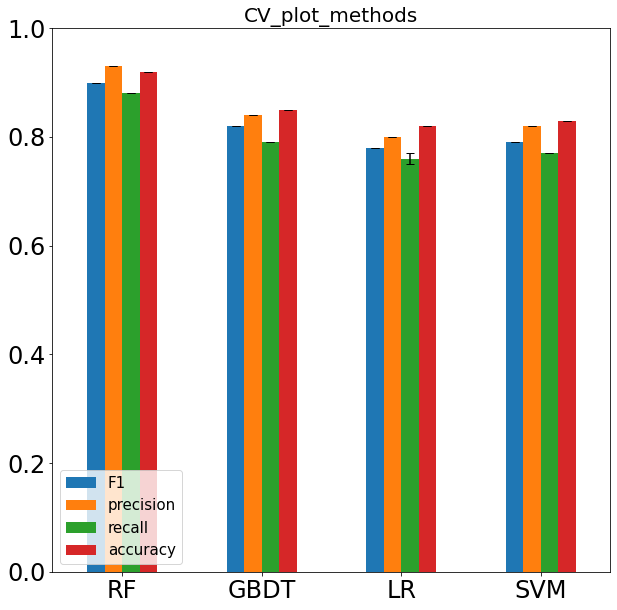

In [23]:
#plot k-fold CV by methods
CV_plot_methods = cv_score_mean.plot(ylim = (0,1), kind = 'bar', 
                                    rot = 0 , stacked = False,
                                    yerr = cv_score_sem, capsize=4,
                                    figsize = (10,10), fontsize = 24)
plt.legend(loc=3, prop={'size': 15})
plt.title('CV_plot_methods',fontsize = 20)
plt.savefig(img_dir + "CV_plot_methods.png")

### Run test set after 10-fold cross-validation
Train/test spliting is set to 80/20.  
Make sure the `train/test` data splitting use the **same** random_state/seed for the **Grid Search**, **cross validation** and **test set** to avoid data leakage.

In [26]:
#create a dataframe to store test set performance
test_set_result = pd.DataFrame()
f1,prec,recall,acc,conf = ([],[],[],[],[])

#evaluate the performance of the different classifiers
for model_name in ['RF','GBDT','LR','SVM']:
    clf = eval(model_name)

    clf.fit(X_train, y_train.ravel())

    pred_test = clf.predict(X_test)
    pred_test_probs = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,pred_test)

    f1.append(f1_score(y_test,pred_test))
    prec.append(precision_score(y_test,pred_test))
    recall.append(recall_score(y_test,pred_test))
    acc.append(accuracy_score(y_test,pred_test))
    conf.append(confusion_matrix(y_test,pred_test))
    
test_set_scores = zip(f1,prec,recall,acc,conf)   

test_set_result = pd.DataFrame(test_set_scores, 
                               columns=['F1','precision','recall',
                                        'accuracy','confusion_matrix'], 
                               index = ['RF','GBDT','LR','SVM'])
test_set_result.round(2)

,F1,precision,recall,accuracy,confusion_matrix
RF,0.91,0.94,0.88,0.92,"[[3938, 173], [355, 2536]]"
GBDT,0.81,0.83,0.78,0.85,"[[3661, 450], [623, 2268]]"
LR,0.78,0.80,0.76,0.82,"[[3561, 550], [692, 2199]]"
SVM,0.79,0.82,0.76,0.83,"[[3622, 489], [701, 2190]]"
